In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [6]:
df = pd.read_csv('adult.csv')

In [7]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Renaming Features
We will add column names to the data set since we don't have any names.

In [65]:
df.columns = ['Age',
'Workclass',
'Fnlwgt',
'Education',
'education_num',
'marital_status',
'occupation',
'relationship',
'race',
'sex',
'capital_gain',
'capital_loss',
'hours_per_week',
'native_country',
'income']

In [9]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
df.shape

(32560, 15)

This data frame has 32560 rows and 15 columns

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no null values in this dataset. This cuts down a lot of pre processing.

In [12]:
X = df.iloc[:,:-1]
y = df.income
#predictors or X set are all the columns except income and income is our target or Y set

In [13]:
X.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [14]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

# Correlation 
Correlation tells us the magnitude of similarites between two columns/features. Our models finds it difficult to determine which is the predictor for certain classes if two columns are too similar. Thus removing either of the columns is a good practise.<br>
**Note:** The columns must be integer or float to be correlated upon.

I will use a heatmap to find the correlation between two columns. In simple words, bluer gradient mean the columns are less similar and as it goes towards red the similarities increases.

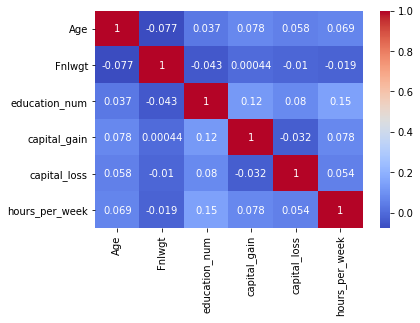

In [67]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,annot = True,cmap ='coolwarm')
plt.show()

**Conclusion**: We find none of the columns to be approximately above 0.4 thus they are not that correlated. We can skip omitting columns based on correlation.

# Splitting Data
Let's split the data into training and testing sets.

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [69]:
print("X training size:",X_train.shape)
print("X test size:",X_test.shape)
print("Y training size:",y_train.shape)
print("Y test size:",y_test.shape)

X training size: (24420, 14)
X test size: (8140, 14)
Y training size: (24420,)
Y test size: (8140,)


# Ordinal Encoding
We must encode the the columns with object datatype. There are multiple ways to handle Label Encoding for this dataset we will stick to **Ordinal Encoding**.

In [70]:
#this gives us a list of all column names who have object dtype
object_col = [col for col in X_train.columns if X_train[col].dtype =='object']

#there might be dissimilarites of features found in training and test set. 
#So let's find the columns with same features in both training and test set.
good_label = [col for col in object_col if set(X_test[col]).issubset(set(X_train[col])) ]
bad_label = set(object_col) - set(good_label)

print("The columns we will use to ordinal encode: ",*good_label,sep=', ')
print("The columns we will drop: ",bad_label)

The columns we will use to ordinal encode: , Workclass, Education, marital_status, occupation, relationship, race, sex, native_country
The columns we will drop:  set()


According to the above analysis we find there are no such columns with different set of attributes in training and test sets. Let's proceed with ordinal encoding.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

od = OrdinalEncoder()
X_train[object_col] = od.fit_transform(X_train[object_col])
X_test[object_col] = od.transform(X_test[object_col])

<ipython-input-19-3f36121bed0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[object_col] = od.fit_transform(X_train[object_col])
C:\Users\sriram\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-19-3f36121bed0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [20]:
X_train.head() #OrdinalEncoded set

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
150,34,4.0,198183,11.0,9,4.0,1.0,1.0,4.0,0.0,0,0,40,39.0
26463,59,4.0,61885,2.0,8,0.0,14.0,2.0,2.0,1.0,0,0,35,39.0
16134,21,4.0,188073,11.0,9,4.0,7.0,3.0,2.0,0.0,0,0,40,39.0
4747,51,4.0,183611,7.0,12,0.0,4.0,4.0,4.0,1.0,0,0,55,11.0
8369,56,5.0,35723,5.0,4,2.0,3.0,0.0,4.0,1.0,0,0,50,39.0


# Evaluation functions

In [71]:
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,accuracy_score,precision_score,recall_score,f1_score

In [72]:
def eval(model):
    print("The training score is,",model.score(X_train,y_train),end='\n')
    print("The testing score is,",model.score(X_test,y_test))

In [73]:
def metric_score(ypred,y_test):
    print("The confusion matrix is: \n",confusion_matrix(ypred,y_test),end='\n')
    print("The classification report is: \n",classification_report(ypred,y_test))
    print("checking precision for >50K: ",round(precision_score(ypred,y_test,average='binary',pos_label=" >50K"),3),"<=50K: ",round(precision_score(ypred,y_test,average='binary',pos_label=" <=50K"),3))
    print("checking recall for >50K: ",round(recall_score(ypred,y_test,pos_label=" >50K"),3),"<=50K: ",round(recall_score(ypred,y_test,average='binary',pos_label=" <=50K"),3))
    print("checking f1 score for >50K: ",round(f1_score(ypred,y_test,pos_label=" >50K"),3),"<=50K: ",round(f1_score(ypred,y_test,average='binary',pos_label=" <=50K"),3))
    print("Model Accuracy score: ",accuracy_score(y_test,ypred)*100,"%")
   

**Note**: *I'll be fine tuning only one model, that is the best among all, based on the results by default parameters.*

# 1) Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
DTmodel = DecisionTreeClassifier(min_samples_split = 2,max_depth = 15,random_state = 0)
DTmodel.fit(X_train,y_train)

ValueError: could not convert string to float: ' Private'

In [76]:
ypred1 = DTmodel.predict(X_test)
ypred1

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [77]:
eval(DTmodel)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Conclusion**: This model is a highly overfit model.

In [78]:
metric_score(ypred1,y_test)

The confusion matrix is: 
 [[5628  747]
 [ 565 1200]]
The classification report is: 
               precision    recall  f1-score   support

       <=50K       0.91      0.88      0.90      6375
        >50K       0.62      0.68      0.65      1765

    accuracy                           0.84      8140
   macro avg       0.76      0.78      0.77      8140
weighted avg       0.85      0.84      0.84      8140

checking precision for >50K:  0.616 <=50K:  0.909
checking recall for >50K:  0.68 <=50K:  0.883
checking f1 score for >50K:  0.647 <=50K:  0.896
Model Accuracy score:  83.88206388206389 %


In [79]:
print("Misclassification percentage: ",((747+565)/(8140)*100))

Misclassification percentage:  16.117936117936118


# 2) Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
LRmodel = LogisticRegression(random_state = 42)
LRmodel.fit(X_train,y_train)

ValueError: could not convert string to float: ' Private'

In [82]:
ypred2 = LRmodel.predict(X_test)
ypred2

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [83]:
eval(LRmodel)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Conclusion**: Acceptable drop in accuracy from training to test sets.

In [84]:
metric_score(ypred2,y_test)

The confusion matrix is: 
 [[6003 1444]
 [ 190  503]]
The classification report is: 
               precision    recall  f1-score   support

       <=50K       0.97      0.81      0.88      7447
        >50K       0.26      0.73      0.38       693

    accuracy                           0.80      8140
   macro avg       0.61      0.77      0.63      8140
weighted avg       0.91      0.80      0.84      8140

checking precision for >50K:  0.258 <=50K:  0.969
checking recall for >50K:  0.726 <=50K:  0.806
checking f1 score for >50K:  0.381 <=50K:  0.88
Model Accuracy score:  79.92628992628993 %


In [85]:
print("Misclassification percentage: ",((190+1444)/(8140)*100))

Misclassification percentage:  20.073710073710075


# 3) KNN Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
Kmodel = KNeighborsClassifier(n_neighbors = 6,metric = 'minkowski',p = 2,leaf_size = 30)
Kmodel.fit(X_train,y_train)

ValueError: could not convert string to float: ' Private'

In [88]:
ypred3 = Kmodel.predict(X_test)
ypred3

ValueError: could not convert string to float: ' Self-emp-inc'

In [89]:
eval(Kmodel)

ValueError: could not convert string to float: ' Private'

In [90]:
metric_score(ypred3,y_test)

The confusion matrix is: 
 [[5948 1486]
 [ 245  461]]
The classification report is: 
               precision    recall  f1-score   support

       <=50K       0.96      0.80      0.87      7434
        >50K       0.24      0.65      0.35       706

    accuracy                           0.79      8140
   macro avg       0.60      0.73      0.61      8140
weighted avg       0.90      0.79      0.83      8140

checking precision for >50K:  0.237 <=50K:  0.96
checking recall for >50K:  0.653 <=50K:  0.8
checking f1 score for >50K:  0.348 <=50K:  0.873
Model Accuracy score:  78.73464373464374 %


In [91]:
print("Misclassification percentage: ",((1486+245)/(8140)*100))

Misclassification percentage:  21.265356265356267


# 4) Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
RFmodel = RandomForestClassifier(min_samples_split=5,max_depth=15,random_state=0)
RFmodel.fit(X_train,y_train)

ValueError: could not convert string to float: ' Private'

In [94]:
ypred4 = RFmodel.predict(X_test)
ypred4

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [95]:
eval(RFmodel)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Conclusion:** Slightly overfit model

In [96]:
metric_score(ypred4,y_test)

The confusion matrix is: 
 [[5870  798]
 [ 323 1149]]
The classification report is: 
               precision    recall  f1-score   support

       <=50K       0.95      0.88      0.91      6668
        >50K       0.59      0.78      0.67      1472

    accuracy                           0.86      8140
   macro avg       0.77      0.83      0.79      8140
weighted avg       0.88      0.86      0.87      8140

checking precision for >50K:  0.59 <=50K:  0.948
checking recall for >50K:  0.781 <=50K:  0.88
checking f1 score for >50K:  0.672 <=50K:  0.913
Model Accuracy score:  86.22850122850123 %


In [97]:
print("Misclassification percentage: ",((798+323)/(8140)*100))

Misclassification percentage:  13.771498771498772


# 5) SGD model

In [98]:
from sklearn.linear_model import SGDClassifier

In [99]:
SGmodel = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
SGmodel.fit(X_train,y_train)

ValueError: could not convert string to float: ' Private'

In [100]:
ypred5 = SGmodel.predict(X_test)
ypred5

NotFittedError: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [101]:
eval(SGmodel)

NotFittedError: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Conclusion**: Consistent score with overall high variance

In [102]:
metric_score(ypred5,y_test)

The confusion matrix is: 
 [[6163 1763]
 [  30  184]]
The classification report is: 
               precision    recall  f1-score   support

       <=50K       1.00      0.78      0.87      7926
        >50K       0.09      0.86      0.17       214

    accuracy                           0.78      8140
   macro avg       0.54      0.82      0.52      8140
weighted avg       0.97      0.78      0.85      8140

checking precision for >50K:  0.095 <=50K:  0.995
checking recall for >50K:  0.86 <=50K:  0.778
checking f1 score for >50K:  0.17 <=50K:  0.873
Model Accuracy score:  77.97297297297298 %


In [103]:
print("Misclassification percentage: ",((1486+181)/(8140)*100))

Misclassification percentage:  20.479115479115478


# Hyper Paramater Tuning
Since we found Random Forest model has best accuracy with default values, let us fine tune its parameters to make it more robust.<br>
I will use RandomSearchCV for the purpose.

## RandomizedSearchCV
We will provide our model with a set of parameters and it will check from the list and give us the best set of parameters.

In [104]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [105]:
params_df = {'criterion':['gini','entropy'],'max_depth':list(range(5,11)),'min_samples_split':list(range(5,15))}

In [106]:
best_model = RandomForestClassifier(random_state=0)

In [107]:
Rsearch = RandomizedSearchCV(estimator = best_model,param_distributions =params_df,scoring='accuracy')

In [108]:
Rsearch.fit(X_train,y_train)

C:\Users\sriram\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept

C:\Users\sriram\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept

C:\Users\sriram\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sriram\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept

ValueError: could not convert string to float: ' Private'

In [ ]:
print(Rsearch.best_params_)
print(Rsearch.best_estimator_)

In [ ]:
best_model=RandomForestClassifier(criterion='entropy',max_depth=10, min_samples_split=5, random_state=0)
best_model.fit(X_train,y_train)

In [109]:
ypredRF =  best_model.predict(X_test)
ypredRF

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [110]:
eval(best_model)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Conclusion**: Robust model with consistent scores,acceptable variance.

In [111]:
metric_score(ypredRF,y_test)

The confusion matrix is: 
 [[5930  914]
 [ 263 1033]]
The classification report is: 
               precision    recall  f1-score   support

       <=50K       0.96      0.87      0.91      6844
        >50K       0.53      0.80      0.64      1296

    accuracy                           0.86      8140
   macro avg       0.74      0.83      0.77      8140
weighted avg       0.89      0.86      0.87      8140

checking precision for >50K:  0.531 <=50K:  0.958
checking recall for >50K:  0.797 <=50K:  0.866
checking f1 score for >50K:  0.637 <=50K:  0.91
Model Accuracy score:  85.54054054054055 %


In [112]:
print("Misclassification percentage: ",((914+263)/(8140)*100))

Misclassification percentage:  14.45945945945946


**Conclusion**: RandomForest classifier proves to be the best model out of all, after hyper parameter tunining the model looks like : *RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=0)*
                       
                       
                       
**Thank you** for reading this **notebook**                      
                      